<a href="https://colab.research.google.com/github/01aleem/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv')

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.shape

(119390, 32)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [19]:
from datetime import datetime

In [20]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: datetime.strptime(x, '%B'))

In [21]:
df['arrival_date_month'].unique()

array(['1900-07-01T00:00:00.000000000', '1900-08-01T00:00:00.000000000',
       '1900-09-01T00:00:00.000000000', '1900-10-01T00:00:00.000000000',
       '1900-11-01T00:00:00.000000000', '1900-12-01T00:00:00.000000000',
       '1900-01-01T00:00:00.000000000', '1900-02-01T00:00:00.000000000',
       '1900-03-01T00:00:00.000000000', '1900-04-01T00:00:00.000000000',
       '1900-05-01T00:00:00.000000000', '1900-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [22]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: x.month)

In [23]:
df['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [26]:
df['date'] = df["arrival_date_day_of_month"].astype(str) + '-' + df["arrival_date_month"].astype(str) + '-' + df["arrival_date_year"].astype(str)

In [28]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [34]:
df.rename(columns = {'is_canceled':'canceled', 'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_week_number':'week_of_month',
                     'is_repeated_guest': 'repeated_guest'}, inplace = True)

In [36]:
df.drop(columns = ['week_of_month'], inplace = True)

In [38]:
df['children'] = df['children'].fillna(0)

In [39]:
df['children'] = df['children'].astype('int')

In [40]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [41]:
df[df['reservation_status']== 'No-Show']

,hotel,canceled,lead_time,year,month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
122,Resort Hotel,1,36,2015,7,4,0,1,1,0,0,BB,PRT,Direct,Direct,0,0,0,E,G,1,No Deposit,250.0,NaN,0,Transient,123.00,0,0,No-Show,2015-07-04,2015-07-04
328,Resort Hotel,1,55,2015,7,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12,2015-07-12
343,Resort Hotel,1,47,2015,7,12,2,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,241.0,NaN,0,Transient,103.80,0,0,No-Show,2015-07-12,2015-07-12
467,Resort Hotel,1,6,2015,7,17,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,C,0,No Deposit,241.0,NaN,0,Transient,110.50,0,1,No-Show,2015-07-17,2015-07-17
472,Resort Hotel,1,3,2015,7,17,0,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,5.0,NaN,0,Transient,107.60,0,0,No-Show,2015-07-17,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104650,City Hotel,1,1,2017,2,1,0,0,1,0,0,BB,AUT,Aviation,Corporate,1,0,1,A,A,0,No Deposit,NaN,153.0,0,Transient,0.00,0,1,No-Show,2017-02-01,2017-02-01
108459,City Hotel,1,31,2017,7,16,2,0,1,0,0,BB,USA,Direct,Direct,1,0,2,A,A,1,No Deposit,NaN,NaN,0,Transient,135.00,0,2,No-Show,2017-07-16,2017-07-16
108829,City Hotel,1,25,2017,5,6,2,1,1,0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,NaN,450.0,0,Transient,125.00,0,0,No-Show,2017-05-06,2017-05-06
111925,City Hotel,1,6,2017,7,17,1,0,1,0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.00,0,0,No-Show,2017-07-17,2017-07-17


In [42]:
# the reservation status column already accounts for cancelations, hence we can drop the column 'canceled'.
# Also the column 'canceled' includes no-shows as well, but treat them as under the umbrella of canceled, which is differentiated in reservation status column 

df.drop(columns = ['canceled'], inplace = True)

In [43]:
# the date column has been created, there is no need for a column for days of the month

df.drop(columns = ['arrival_date_day_of_month'], inplace = True)

In [44]:
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [45]:
# we drop the agents column as it does not provide any valueable insights

df.drop(columns = ['agent'], inplace = True)

In [46]:
df['company'].isnull().sum()*100 / df.shape[0]

94.30689337465449

In [47]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [48]:
df.drop(columns = ['company'], inplace = True)

In [49]:
df.rename(columns = {'total_of_special_requests':'special_requests', 'required_car_parking_spaces':'car_parks_required'}, inplace = True)

In [50]:
df.drop(columns = ['adr'], inplace = True)

In [51]:
df.rename(columns = {'previous_bookings_not_canceled':'previous_stays'}, inplace = True)

In [52]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MMR        1
SDN        1
BDI        1
NCL        1
MLI        1
Name: country, Length: 177, dtype: int64

In [53]:
# nan values for prt is less than 5%, it can be dropped

df = df.dropna(axis = 0)

In [58]:
no_children_df = df[df['children'] == 0]

In [59]:
no_children_df['hotel'].value_counts()

City Hotel      74200
Resort Hotel    36123
Name: hotel, dtype: int64

In [60]:
with_children_df = df[df['children'] != 0]

In [61]:
with_children_df['hotel'].value_counts()

City Hotel      5106
Resort Hotel    3473
Name: hotel, dtype: int64

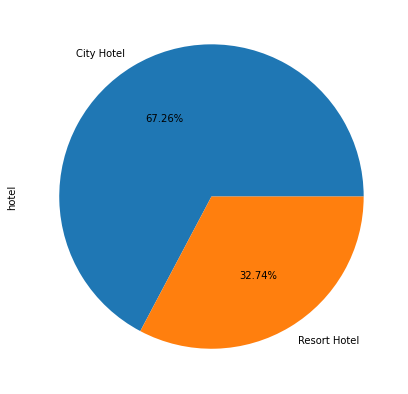

In [62]:
# a higher proportion of people without children prefer the city hotel. With children, that proportion seems to drop.

fig= plt.figure(figsize=(15,7))
no_children_df['hotel'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

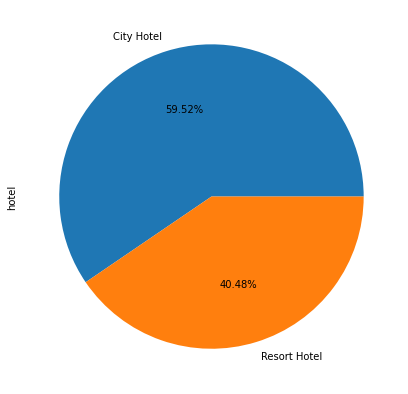

In [63]:
# a higher proportion of people without children prefer the city hotel. With children, that proportion seems to drop.

fig= plt.figure(figsize=(15,7))
with_children_df['hotel'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [64]:
stays_by_year = pd.DataFrame(df['year'].value_counts()).sort_index(ascending = True)

In [65]:
stays_by_year.reset_index(level=0, inplace=True)

In [66]:
stays_by_year

,index,year
0,2015,21863
1,2016,56435
2,2017,40604


Text(0, 0.5, 'year')

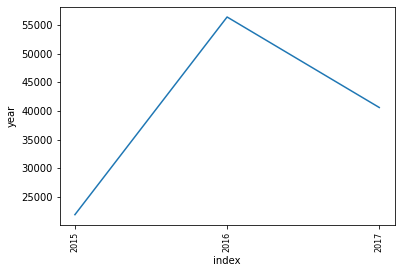

In [67]:
sns.lineplot(data = stays_by_year, x = 'index', y = 'year')
plt.xticks(stays_by_year['index'], rotation = 'vertical', size = 8)
plt.xlabel("index")
plt.ylabel("year")

In [71]:
# the number of stays rose between 2015 and 2016, and then declined again. We can check until which month of 2017 the data was collected

df.groupby('year')['month'].unique()

year
2015                      [7, 8, 9, 10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                   [1, 2, 3, 4, 5, 6, 7, 8]
Name: month, dtype: object

In [73]:
# hence, we can see that only 6 months of data was collected in 2015 and only 8 months of data was collected in 2017.
# Not a very meaningful comparision can be made out between the years, hence no trend can be seen

In [74]:
df.head()

,hotel,lead_time,year,month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,repeated_guest,previous_cancellations,previous_stays,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,car_parks_required,special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,342,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,737,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,7,2015,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,13,2015,7,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,14,2015,7,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0,1,Check-Out,2015-07-03,2015-07-01


In [76]:
df.groupby('market_segment')['repeated_guest'].value_counts()

market_segment  repeated_guest
Aviation        0                   173
                1                    64
Complementary   0                   504
                1                   230
Corporate       0                  3638
                1                  1473
Direct          0                 11655
                1                   794
Groups          0                 19536
                1                   270
Offline TA/TO   0                 23781
                1                   379
Online TA       0                 55807
                1                   596
Undefined       0                     2
Name: repeated_guest, dtype: int64

In [77]:
# the highest proportion of repeated guest is from the complimentary segment
# Second highest proportion of repeated guests is from the Corporate segment

In [78]:
df.head()

,hotel,lead_time,year,month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,repeated_guest,previous_cancellations,previous_stays,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,car_parks_required,special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,342,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,737,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,7,2015,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,13,2015,7,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,14,2015,7,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0,1,Check-Out,2015-07-03,2015-07-01


In [79]:
df['reservation_status'].value_counts()

Check-Out    74745
Canceled     42954
No-Show       1203
Name: reservation_status, dtype: int64

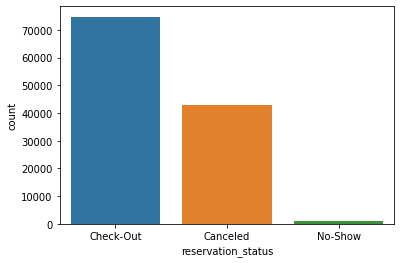

In [85]:
sns.countplot(x = 'reservation_status', data = df )

In [86]:
# we can check which segment amouonts for most cancelations

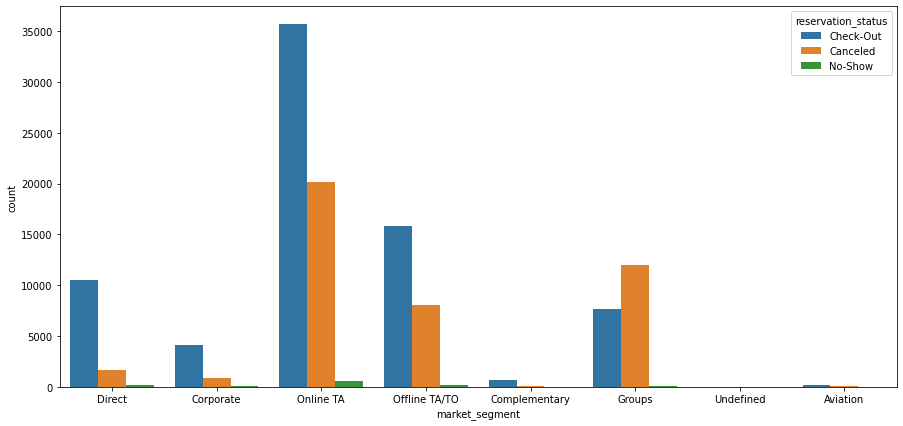

In [90]:
fig= plt.figure(figsize=(15,7))
sns.countplot(x = 'market_segment', data = df, hue = 'reservation_status')

In [91]:
  df.groupby('market_segment')['reservation_status'].value_counts()

market_segment  reservation_status
Aviation        Check-Out               185
                Canceled                 41
                No-Show                  11
Complementary   Check-Out               644
                Canceled                 78
                No-Show                  12
Corporate       Check-Out              4133
                Canceled                905
                No-Show                  73
Direct          Check-Out             10528
                Canceled               1710
                No-Show                 211
Groups          Canceled              12023
                Check-Out              7709
                No-Show                  74
Offline TA/TO   Check-Out             15882
                Canceled               8047
                No-Show                 231
Online TA       Check-Out             35664
                Canceled              20148
                No-Show                 591
Undefined       Canceled                 